#Automatic Facial Age Estimation  Notebook
##Method: Transfer learning on RestNet50 using Ktrain
##Dataset: BlackFaces

In [2]:
#install ktrain library
!pip install ktrain #Ktrain is a leight weight for Tensorfow and keras libraries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 57.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.0-py3-none-any.whl size=25316877 sha256=1d933b9635dbab45f3a94cc0ae6aaf08a682c2b8afc78de8b6c0213c571219ab
  Stored in directory: /root/.cache/pip/wheels/31/61/66/30b156e1dc16721ab5bd0beeda55895a606e6536a310d1aa91
  Created wheel for keras_bert: filename=

In [3]:
#Download dataset to collab session
import gdown
!gdown 'https://drive.google.com/uc?id=1R2t-6uySsB5EfySSFsgofrQNPKTvkbfo'


Downloading...
From (original): https://drive.google.com/uc?id=1R2t-6uySsB5EfySSFsgofrQNPKTvkbfo
From (redirected): https://drive.google.com/uc?id=1R2t-6uySsB5EfySSFsgofrQNPKTvkbfo&confirm=t&uuid=0a76c19e-2b18-4e1a-b564-e5546438b850
To: /content/FAE_D1_collated.zip
100% 521M/521M [00:11<00:00, 44.1MB/s]


In [4]:
#unzip the dataset
!unzip FAE_D1_collated.zip

Streaming output truncated to the last 5000 lines.
  inflating: FAE_D1_collated/36_0_6_32.jpg  
  inflating: FAE_D1_collated/36_0_6_33.jpg  
  inflating: FAE_D1_collated/36_0_6_34.jpg  
  inflating: FAE_D1_collated/36_0_6_35.jpg  
  inflating: FAE_D1_collated/36_0_6_36.jpg  
  inflating: FAE_D1_collated/36_0_6_37.jpg  
  inflating: FAE_D1_collated/36_0_6_38.jpg  
  inflating: FAE_D1_collated/36_0_6_39.jpg  
  inflating: FAE_D1_collated/36_0_6_41.jpg  
  inflating: FAE_D1_collated/36_0_6_42.jpg  
  inflating: FAE_D1_collated/36_0_6_44.jpg  
  inflating: FAE_D1_collated/36_0_6_45.jpg  
  inflating: FAE_D1_collated/36_0_6_46.jpg  
  inflating: FAE_D1_collated/36_0_6_47.jpg  
  inflating: FAE_D1_collated/36_0_6_49.jpg  
  inflating: FAE_D1_collated/36_0_6_5.jpg  
  inflating: FAE_D1_collated/36_0_6_51.jpg  
  inflating: FAE_D1_collated/36_0_6_52.jpg  
  inflating: FAE_D1_collated/36_0_6_53.jpg  
  inflating: FAE_D1_collated/36_0_6_54.jpg  
  inflating: FAE_D1_collated/36_0_6_55.jpg  
  inf

##Regular Expression for Image label pattern identification
###code explanation
([^/]+): Matches one or more characters that are not a forward slash / and captures them within a group.

_\d+_\d+_\d+: Matches underscores followed by one or more digits repeated three times.

\.(: Begins the extension capture group.

jpg|jpeg|png: Matches either jpg, jpeg, or png.

)$: Closes the extension capture group and specifies that the pattern must match at the end of the string.



In [5]:
#import regular expression (for our dataset label/anotation)
import re

#passing our dataset image label pattern to regular expression
pattern = r'([^/]+)_\d+_\d+_\d+\.(jpg|jpeg|png)$'
p = re.compile(pattern)

filename = '/content/FAE_D1_collated/10_1_6_29.jpg' # filename = copy a filename from our dataset

match = p.search(filename)
if match:
    print(match.group(1))  # Print the first captured group
else:
    print("No match found.")



10


In [30]:
#import libraries and dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import ktrain
from ktrain import vision as vis
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import pandas as pd


#Parsing image variables (category)
This line of code below is used for assigning the return values of the function images_from_fname(DATADIR) to three variables: train_data, test_data, and preproc.

In [7]:
#creating directory for train_test data split
data_dir= '/content/FAE_D1_collated'

#passing the defined variables for the dataset through ktrain

(train_data, test_data, preproc) = vis.images_from_fname(data_dir)

['0_0_1', '0_0_2', '0_0_4', '0_0_6', '0_1_1', '100_0_6', '10_0_6', '10_1_6', '11_0_6', '12_0_1', '13_0_1', '13_1_1', '14_1_1', '15_0_1', '15_0_2', '15_1_1', '16_1_1', '17_0_1', '17_1_1', '18_0_1', '18_1_1', '18_1_6', '19_0_6', '19_1_1', '19_1_4', '19_1_5', '1_0_6', '1_1_1', '20_0_2', '20_1_4', '20_1_6', '21_0_6', '21_1_4', '22_0_1', '22_1_5', '22_1_6', '23_0_2', '23_1_1', '23_1_2', '23_1_3', '23_1_4', '23_1_6', '24_0_2', '24_0_3', '24_1_2', '24_1_5', '25_0_1', '25_0_6', '25_1_2', '25_1_6', '26_0_4', '26_1_3', '26_1_6', '27_0_1', '27_0_5', '27_1_5', '28_0_2', '28_0_4', '28_0_5', '28_0_6', '28_1_6', '29_0_4', '29_0_5', '29_0_6', '29_1_1', '29_1_4', '29_1_6', '2_0_6', '2_1_1', '30_0_2', '30_0_4', '30_0_6', '30_1_1', '30_1_5', '30_1_6', '31_0_1', '31_0_2', '31_0_3', '31_0_4', '31_0_5', '31_1_4', '31_1_6', '32_0_1', '32_0_2', '32_0_5', '32_0_6', '32_1_2', '32_1_3', '32_1_6', '33_0_5', '33_0_6', '33_1_2', '33_1_5', '33_1_6', '34_0_2', '34_0_4', '34_0_5', '34_0_6', '34_1_1', '34_1_4', '34_1_6

In [ ]:
# Dataset Parameters
image_size = (224, 224)  # Image size for ResNet50
batch_size = 64 # Adjust based on your hardware(cuda or cpu)

In [ ]:
#Checking for available pretrained classifiers for the regression task
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [11]:
#Selecting pretrained_RESNET50 as our base model
model = vis.image_regression_model('pretrained_resnet50', train_data=train_data,
                                   val_data =test_data, metrics=['mae'],
                                   optimizer_name= 'sgd')

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94765736/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


# Implicit Model information for pretrained ResNet50
image size: 224 x224
##Val_data: validation dataset
##train_data: training dataset
##preproc: preprocessed dataset

In [19]:
#Let's wrap the model with a learner for training our new dataset
#learner is a model object from ktrain library
#base_model='pretrained_resnet50', preprocess_mode='data_dir'
learner=ktrain.get_learner(model=model, train_data=train_data,
                           val_data=test_data, batch_size=64)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
110/110 [==============================] - 934s 8s/step - loss: 9.2899 - mae: 0.0075
Epoch 2/2
110/110 [==============================] - 373s 3s/step - loss: 160.9661 - mae: 0.0069


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


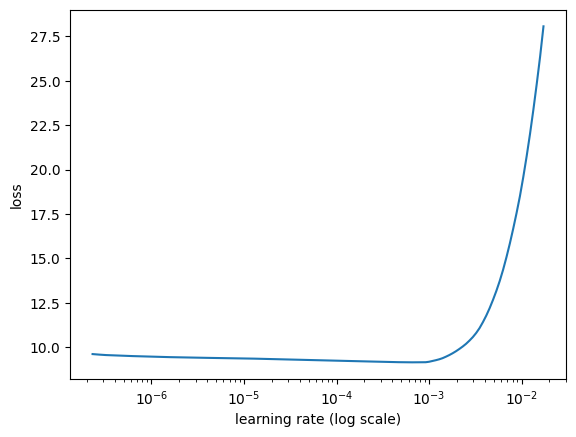

In [13]:
#Simulate training for different learning rates
#Estimate and choose the optimal learning rate
#Plot the graph
learner.lr_find(max_epochs=2)
learner.lr_plot()



begin training using onecycle policy with max lr of 0.001...
Epoch 1/6
111/111 [==============================] - 1064s 10s/step - loss: 11.5872 - mae: 0.0073 - val_loss: 11.9334 - val_mae: 0.0072
Epoch 2/6
111/111 [==============================] - 1078s 10s/step - loss: 3.9933 - mae: 0.0037 - val_loss: 20.7342 - val_mae: 0.0072
Epoch 3/6
111/111 [==============================] - 1070s 10s/step - loss: 6.8639 - mae: 0.0034 - val_loss: 34.4840 - val_mae: 0.0072
Epoch 4/6
111/111 [==============================] - 1056s 10s/step - loss: 4.4807 - mae: 0.0021 - val_loss: 31.0609 - val_mae: 0.0071
Epoch 5/6
111/111 [==============================] - 1024s 9s/step - loss: 1.1163 - mae: 6.5174e-04 - val_loss: 29.3317 - val_mae: 0.0071
Epoch 6/6
111/111 [==============================] - 1068s 10s/step - loss: 0.3588 - mae: 2.3185e-04 - val_loss: 27.5289 - val_mae: 0.0071


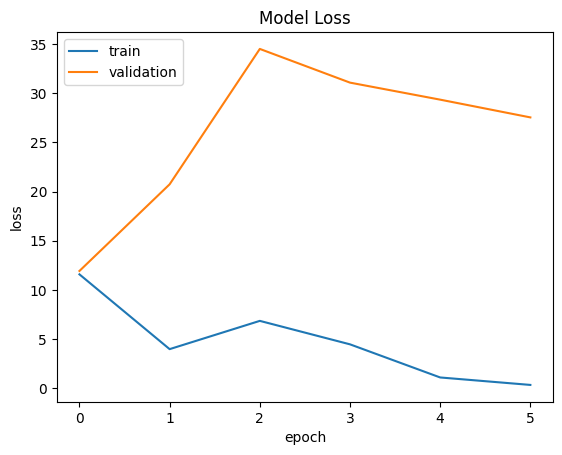

In [14]:
#model finetuning
#from  the plot, we pick a learning rate of 1e-03
#passing the learning rate and number of epochs for training
learner.fit_onecycle(1e-3, 6) #lr= 0.001, epoch=6
#plot loss
learner.plot('loss')


In [21]:
# Evaluating the model
learner.evaluate()


25/25 [==============================] - 110s 4s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         5
          20       0.00    

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

25/25 [==============================] - 106s 4s/step


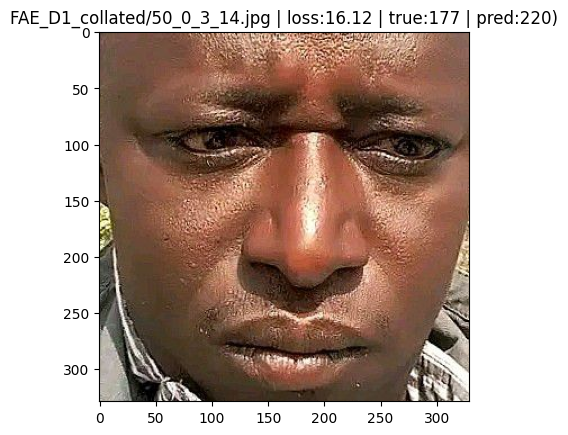

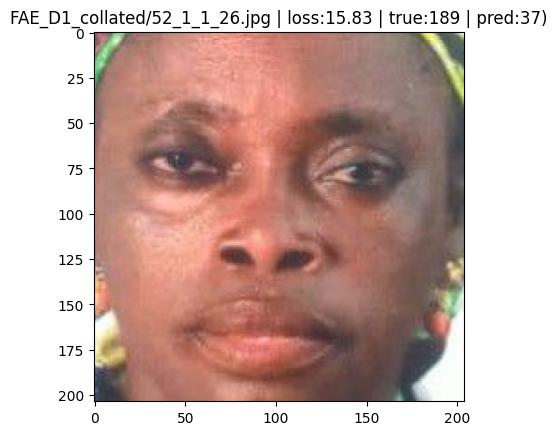

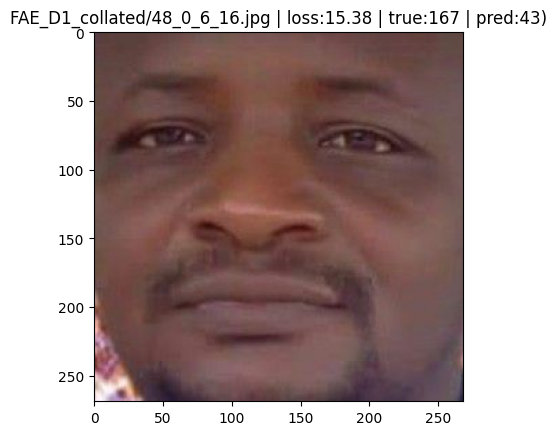

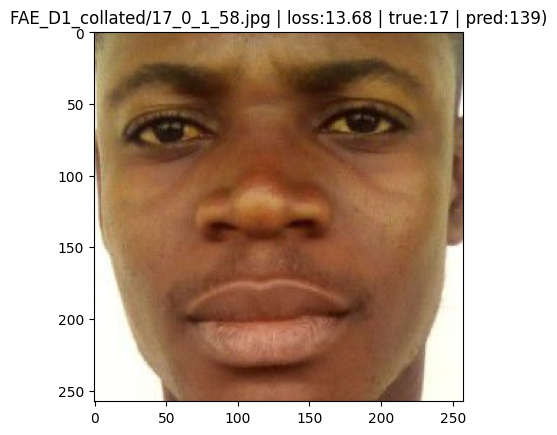

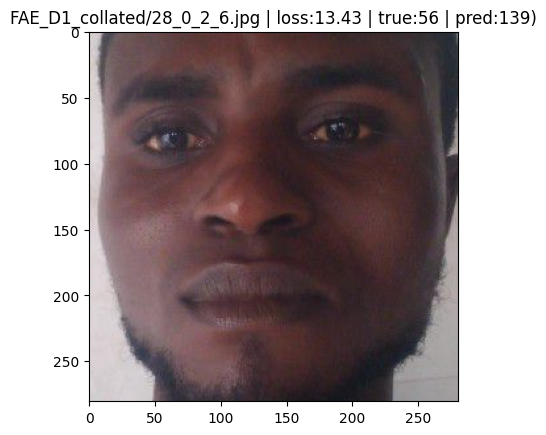

In [23]:
#View validation examples with highest loss
learner.view_top_losses(n=5, preproc=None, val_data=None)

In [24]:
#show the model structure
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [25]:
# Saving the model
#Creating our predictor
predictor = ktrain.get_predictor(learner.model, preproc) #predictor
predictor.save('age_estimation_model')

In [27]:
#To get (5-15) validation images from the test_dataset
test_data.filenames[5:15]

['34_0_4_59.jpg',
 '50_0_3_14.jpg',
 '43_1_4_47.jpg',
 '24_1_5_28.jpg',
 '51_0_2_39.jpg',
 '36_1_6_37.jpg',
 '44_0_6_19.jpg',
 '16_1_1_52.jpg',
 '37_1_6_10.jpg',
 '55_1_1_15.jpg']

In [31]:
# To use the saved model...
# Load the saved model
from ktrain import load_predictor

predictor = load_predictor('age_estimation_model')

# Now we can use the predictor for making predictions on new images


In [29]:
#Age Estimation code blocks
def show_age_estimate(fname):
    fname=data_dir + '/' + fname   #file name
    estimate = round(predictor.predict_filename(fname)[0]) #predict age
    actual = int(p.search(fname).group(1))   #get actual age from data label
    vis.show_image(fname)                    #show image
    print('Estimated age: %s | Actual Age: %s' % (estimate, actual))

In [36]:
#Verify that we can extract age_gender_ethnicity from images
data_dir = '/content/FAE_D1_collated'
fname = '/10_1_6_13.png'
fname=data_dir + '/' + fname
#pred =round(model.predict_filename(fname)[0])
print('The age_gender_ethinicity of the user label is: '+ predictor.predict_filename(fname)[0])


The age_gender_ethinicity of the user label is: 38_1_5


Estimated age: 32 | Actual Age: 37


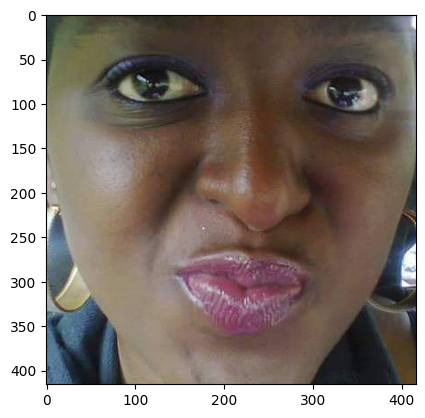

In [52]:
#Let's make prediction here
def show_age_estimate(fname):
    fname=data_dir + '/' + fname
     ## Example_value of core_attributes_seq = '38_1_5' in the order age_gender_ethnicity
    core_attributes_seq = predictor.predict_filename(fname)[0].split('_')
    pred =round(int(core_attributes_seq[0]))  ##The round function does not directly take in a string but the 'int' function does
    actual = round(int(p.search(fname).group(1)))
    vis.show_image(fname)
    print('Estimated age: %s | Actual Age: %s' % (pred, actual))

#Make age prediction
show_age_estimate('37_1_6_10.jpg')

Estimated age: 43 | Actual Age: 55


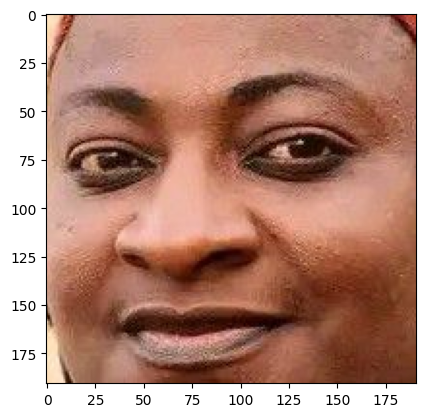

In [63]:
#Let's make another prediction
def show_age_estimate(fname):
    fname=data_dir + '/' + fname
     ## Example_value of core_attributes_seq = '38_1_5' in the order age_gender_ethnicity
    core_attributes_seq = predictor.predict_filename(fname)[0].split('_')
    pred =round(int(core_attributes_seq[0]))  ##The round function does not directly take in a string but the 'int' function does
    actual = round(int(p.search(fname).group(1)))
    vis.show_image(fname)
    print('Estimated age: %s | Actual Age: %s' % (pred, actual))

#Make age prediction
show_age_estimate('55_1_1_15.jpg')

Estimated age: 15 | Actual Age: 24


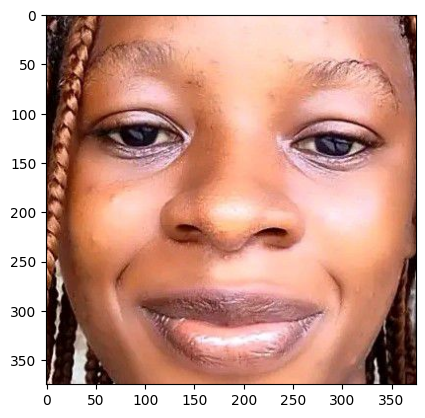

In [64]:
#Let's make another prediction
def show_age_estimate(fname):
    fname=data_dir + '/' + fname
     ## Example_value of core_attributes_seq = '38_1_5' in the order age_gender_ethnicity
    core_attributes_seq = predictor.predict_filename(fname)[0].split('_')
    pred =round(int(core_attributes_seq[0]))  ##The round function does not directly take in a string but the 'int' function does
    actual = round(int(p.search(fname).group(1)))
    vis.show_image(fname)
    print('Estimated age: %s | Actual Age: %s' % (pred, actual))

#Make age prediction
show_age_estimate('24_1_5_28.jpg')


In [53]:
#For Real time prediction using camera
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


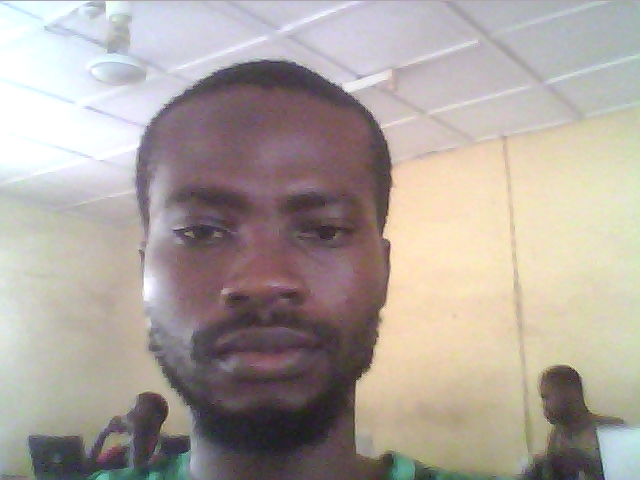

In [54]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Your estimated age is: 3616


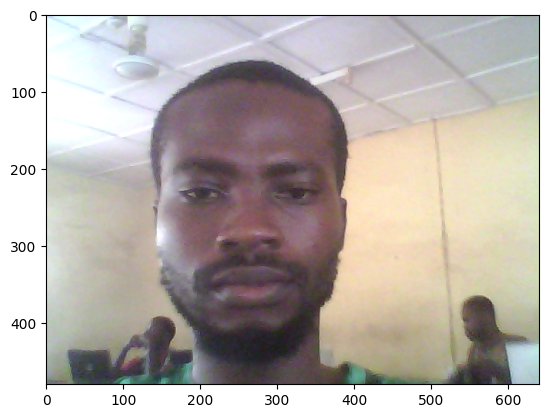

In [62]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = int(predictor.predict_filename(fname)[0])
    pred = round(pred)
    vis.show_image(fname)
    print('Your estimated age is: %s' % pred)
real_time_prediction('photo.jpg')

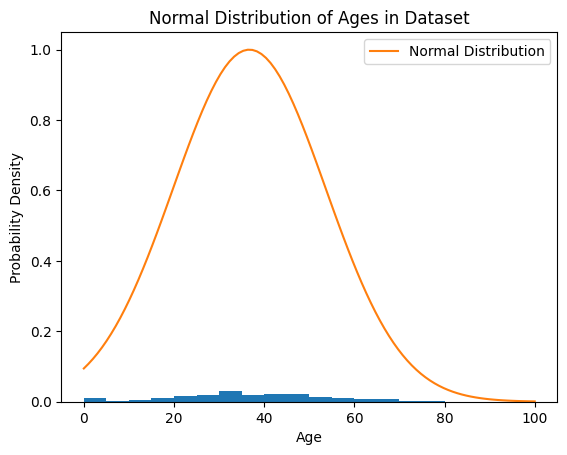

In [65]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Define the regular expression for filename pattern
pattern = r"([^/]+)_\d+_\d+_\d+\.(jpg|jpeg|png)$"
p = re.compile(pattern)

# Function to extract age from filename and append to a list
def extract_ages(data_dir):
  ages = []
  for filename in os.listdir(data_dir):
    match = p.search(filename)
    if match:
      age = int(match.group(1))  # Extract the age as an integer
      ages.append(age)
  return ages

# Function to plot the normal distribution curve
def plot_normal_distribution(ages):
  plt.hist(ages, bins=20, density=True)  # Plot histogram with density normalization
  x = np.linspace(min(ages), max(ages), 100)  # Generate x-axis values for smooth curve
  mu = np.mean(ages)  # Calculate mean
  sigma = np.std(ages)  # Calculate standard deviation
  y = np.exp(-(x - mu)**2 / (2 * sigma**2))  # Calculate normal distribution probability density function
  plt.plot(x, y, label='Normal Distribution')
  plt.xlabel('Age')
  plt.ylabel('Probability Density')
  plt.title('Normal Distribution of Ages in Dataset')
  plt.legend()
  plt.show()

# Example usage
data_dir = "/content/FAE_D1_collated"  # Replace with your dataset directory
ages = extract_ages(data_dir)

if ages:
  plot_normal_distribution(ages)
else:
  print("No files found matching the pattern in the specified directory.")
